Data preparation and processing

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels = []
train_samples = []

Example data:



*   An experiment drug was tested on individuals from ages 13 to 100 in a clinical trial.
*   The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.

*   Around 95% of patients 65 or older experienced side effects.
*   Around 95% of patients under 65 experienced no side effects.





In [ ]:
for i in range(50):
  # 5% of younger individuals who did experience side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  # 5% of older individuals who did not experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  # 95% of younger individuals who did not experience side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  # 95% of older individuals who did experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)



In [ ]:
print(train_samples.shape)

(2100,)


In [ ]:
print(train_labels)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 

In [ ]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
train_samples, train_labels = shuffle(train_samples, train_labels)

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [ ]:
print(scaled_train_samples.shape)


(2100, 1)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
model = Sequential()
model.add(Dense(units = 16, input_shape=(1,), activation = 'relu')),
model.add(Dense(units = 32, activation = 'relu')),
model.add(Dense(units = 2, activation = 'softmax'))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                32        
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# model configuration
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
# training the model
model.fit(x=scaled_train_samples, y=train_labels, validation_split = 0.1, batch_size = 10, epochs = 30, verbose = 2)

Epoch 1/30
189/189 - 1s - loss: 0.2443 - accuracy: 0.9413 - val_loss: 0.2338 - val_accuracy: 0.9524 - 593ms/epoch - 3ms/step
Epoch 2/30
189/189 - 0s - loss: 0.2442 - accuracy: 0.9455 - val_loss: 0.2340 - val_accuracy: 0.9524 - 411ms/epoch - 2ms/step
Epoch 3/30
189/189 - 1s - loss: 0.2439 - accuracy: 0.9444 - val_loss: 0.2330 - val_accuracy: 0.9524 - 606ms/epoch - 3ms/step
Epoch 4/30
189/189 - 1s - loss: 0.2439 - accuracy: 0.9466 - val_loss: 0.2334 - val_accuracy: 0.9524 - 745ms/epoch - 4ms/step
Epoch 5/30
189/189 - 1s - loss: 0.2437 - accuracy: 0.9413 - val_loss: 0.2334 - val_accuracy: 0.9524 - 697ms/epoch - 4ms/step
Epoch 6/30
189/189 - 1s - loss: 0.2436 - accuracy: 0.9439 - val_loss: 0.2342 - val_accuracy: 0.9524 - 694ms/epoch - 4ms/step
Epoch 7/30
189/189 - 1s - loss: 0.2430 - accuracy: 0.9476 - val_loss: 0.2323 - val_accuracy: 0.9524 - 667ms/epoch - 4ms/step
Epoch 8/30
189/189 - 0s - loss: 0.2429 - accuracy: 0.9444 - val_loss: 0.2323 - val_accuracy: 0.9524 - 385ms/epoch - 2ms/step


Creating Test Data

In [ ]:
test_labels = []
test_samples = []

In [ ]:
for i in range(10):
  # 5% of younger individuals who did experience side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  # 5% of older individuals who did not experience side effects
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  # 95% of younger individuals who did not experience side effects
  random_younger = randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  # 95% of older individuals who did experience side effects
  random_older = randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)



In [ ]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
test_samples, test_labels = shuffle(test_samples, test_labels)

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [ ]:
predictions = model.predict(x=scaled_test_samples, batch_size = 10, verbose = 0)

In [ ]:
for i in predictions:
  print(i)

[0.85803246 0.14196745]
[0.11830679 0.8816932 ]
[0.96308446 0.03691551]
[0.13362618 0.8663738 ]
[0.06315038 0.9368496 ]
[0.04913829 0.95086163]
[0.0259057 0.9740943]
[0.961705   0.03829492]
[0.00910351 0.9908965 ]
[0.9617051  0.03829492]
[0.9576079 0.0423921]
[0.04913829 0.95086163]
[0.11830679 0.8816932 ]
[0.9613525  0.03864743]
[0.9642446  0.03575538]
[0.9620545 0.0379455]
[0.9158074  0.08419259]
[0.9297926  0.07020743]
[0.9602762  0.03972374]
[0.94425017 0.0557498 ]
[0.96591866 0.03408124]
[0.9613525  0.03864743]
[0.38652563 0.61347437]
[0.01753899 0.98246104]
[0.00910351 0.9908965 ]
[0.6887244  0.31127563]
[0.00470603 0.9952939 ]
[0.9606382  0.03936183]
[0.6324964 0.3675036]
[0.9297926  0.07020743]
[0.94425017 0.0557498 ]
[0.9158074  0.08419259]
[0.93595076 0.06404922]
[0.9035212  0.09647881]
[0.961705   0.03829492]
[0.96274424 0.03725581]
[0.11830679 0.8816932 ]
[0.6324964 0.3675036]
[0.9620545 0.0379455]
[0.96308446 0.03691551]
[0.0432894 0.9567106]
[0.01998137 0.9800187 ]
[0.017

In [ ]:
rounded_predictions = np.argmax(predictions, axis = -1)

In [ ]:
for i in rounded_predictions:
  print(i)

0
1
0
1
1
1
1
0
1
0
0
1
1
0
0
0
0
0
0
0
0
0
1
1
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
1
1
1
0
1
0
0
0
0
1
0
1
1
1
0
0
0
0
1
0
0
1
1
1
1
1
1
1
0
1
0
0
1
0
0
1
1
0
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
1
1
1
0
0
0
0
0
1
1
0
1
0
0
1
0
0
1
1
1
1
0
1
0
1
1
1
1
1
1
1
0
1
0
0
0
1
1
0
1
0
0
0
1
0
0
0
0
1
1
0
1
1
1
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
1
1
1
1
0
0
1
1
1
1
1
0
1
1
1
0
0
1
1
0
1
0
1
0
1
0
0
0
1
1
1
1
1
0
1
1
1
0
1
0
1
1
1
1
1
1
0
0
1
0
1
1
1
1
0
1
1
0
1
0
1
0
1
1
1
1
0
1
0
0
1
1
1
0
1
1
1
0
0
0
0
1
1
0
0
0
0
0
1
1
1
0
0
1
0
0
1
1
1
1
0
1
0
0
1
1
0
1
0
0
1
0
1
0
1
0
1
0
0
1
0
0
1
0
1
1
1
1
1
1
0
1
1
0
1
1
0
0
0
1
0
0
0
1
1
1
1
0
1
1
0
0
0
1
0
0
1
1
1
0
1
1
1
1
1
1
1
1
1
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
1
1
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
0
1
1
0
0
0
0
1
1
0
1
0
0
0
0
1
0
0
1
1
1
0
1
0
1
0
1
1
0
1
0
1
1
0
1
0
0
1
0
0
0
0
1
0


Confusion Matrix

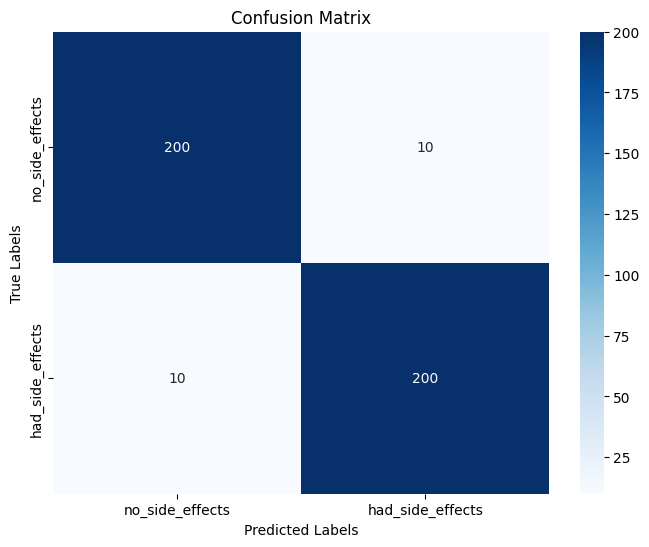

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_true = test_labels
y_pred = rounded_predictions

classes = ['no_side_effects', 'had_side_effects']

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
